In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import networkx as nx
import random
import copy

import sys
sys.path.append("Fall 2024")

import kmax as kx
import utility as util
from hierarchy import *
import z_solver as zs

## Z histograms

In [4]:
lam = 0.8
offspring_dist = lambda: np.random.poisson(lam)
edge_dist = lambda: np.random.uniform(0, 1)
z_vals_along_path = []
num_samples = 100000
for _ in range(num_samples):
    # Generate tree
    tree = nx.Graph(GWBP(dist=offspring_dist, MAXLEVEL=10))
    for u,v in tree.edges():
        tree[u][v]['weight'] = edge_dist()

    if tree.number_of_nodes() == 1:
        continue
    
    # Get Z values, children
    tups = util.path_cover(tree, root=0, return_tuples=True)
    Z = {v:tup[1] for v,tup in tups}
    v1 = {v:tup[2] for v,tup in tups}
    v2 = {v:tup[3] for v,tup in tups}

    current_node = 0 # first max child of root 0
    while v1[current_node] is not None and Z[v1[current_node]] >= 0:
        current_node = v1[current_node]
        z_vals_along_path.append(Z[current_node])

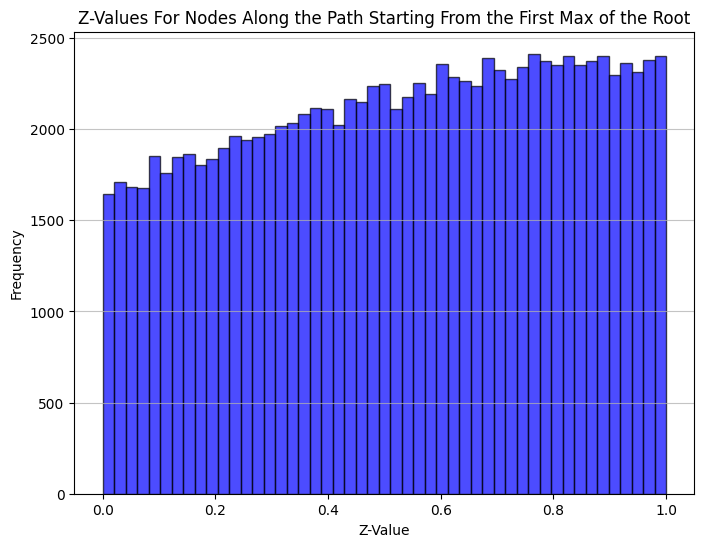

In [5]:
plt.figure(figsize=(8, 6))
plt.hist(z_vals_along_path, bins="auto", color="blue", edgecolor="black", alpha=0.7)
plt.title("Z-Values For Nodes Along the Path Starting From the First Max of the Root")
plt.xlabel("Z-Value")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.show()

In [6]:
lam = 0.8
offspring_dist = lambda: np.random.poisson(lam)
edge_dist = lambda: np.random.uniform(0, 1)
z_vals_random = []
num_samples = 100000
for _ in range(num_samples):
        # Generate tree
    tree = nx.Graph(GWBP(dist=offspring_dist, MAXLEVEL=10))
    for u,v in tree.edges():
        tree[u][v]['weight'] = edge_dist()

    if tree.number_of_nodes() < 1:
        continue

    # Get Z values, children
    tups = util.path_cover(tree, root=0, return_tuples=True)
    # need to exclude root because we are assuming it has no z-value
    try:
        Z = {v:tup[1] for v,tup in tups if v == 0}
    except:
        print(tups)
        break
    z_vals_random += list(Z.values())

In [7]:
z_count_less_than_zero = sum(1 for z in z_vals_random if z <= 0)
total_z_values = len(z_vals_random)
print(z_count_less_than_zero / total_z_values)
xs, ys, f_bars = zs.compute_z_pdf(lam, num_samples = 1000)

0.06289


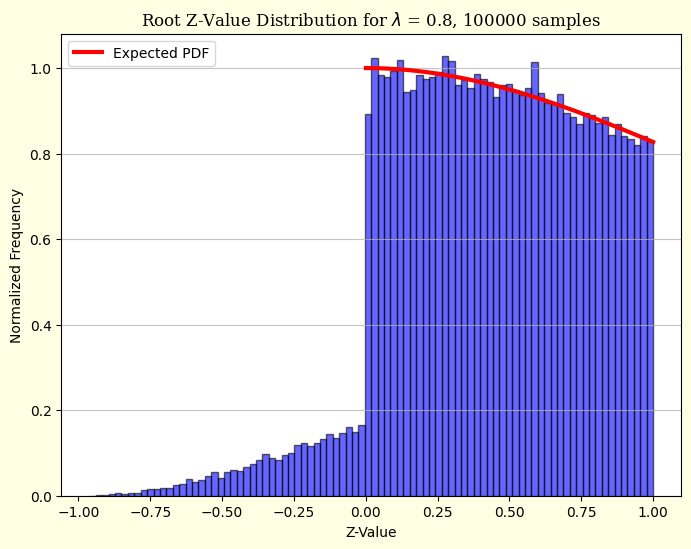

In [8]:
z_vals_random_pos = [z for z in z_vals_random if z > 0]
fig = plt.figure(figsize=(8, 6))
fig.patch.set_facecolor('xkcd:off white')
plt.plot(xs, ys, '-', label=['Expected PDF'], color='red', linewidth = 3.0)
plt.hist(z_vals_random, bins="auto", color="blue", edgecolor="black", alpha=0.6, density="True")
plt.title(f"Root Z-Value Distribution for $\\lambda$ = {lam}, {num_samples} samples", fontfamily = ['Serif'])
plt.xlabel("Z-Value")
plt.ylabel("Normalized Frequency")
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

In [9]:
xs, ys, f_bars = zs.compute_z_pdf(0.7, 10000)

/tmp/ipykernel_15022/3939675687.py:2: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(xs, ys, '-', label=['CDF', 'density'])


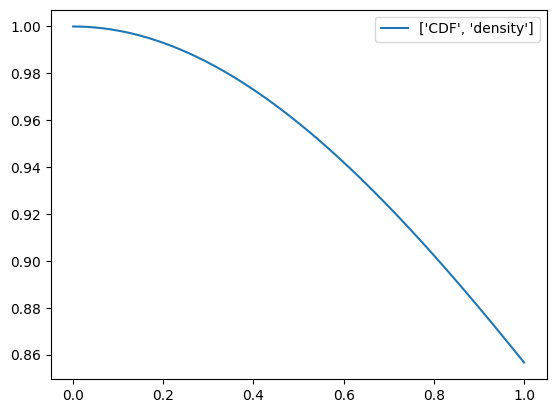

In [10]:
plt.figure()
plt.plot(xs, ys, '-', label=['CDF', 'density'])
plt.legend()